## Figure 1: Cluster centroids by latitude for key variabes for the present day (4 panels)
a) surface temperature LCD observations
b) precipitation LCD observations
c) Surface temperature CESM climate model
d) precipitation CESM climate model

- LCD observations 2011-2021
- CESM climate model 2011-2040, change to 2011-2021 for consistency
- surface temperature units: $^{\circ}C$
- precipitation units: $mm/day$

In [1]:
# imports
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import pandas as pd
import matplotlib as mpl

In [2]:
# read in observational data (LCD)
obsCentroids = pd.read_csv('/glade/work/scrandall/clustered_data/obs_centroids_2011_2021.csv').drop(['Unnamed: 0'], axis = 1)
obsMeans = pd.read_csv('/glade/work/scrandall/clustered_data/obs_means_2011_2021.csv').drop(['Unnamed: 0'], axis = 1)

In [3]:
# read in climate model data (CESM)
modelCentroids = pd.read_csv('/glade/work/scrandall/clustered_data/cesm_centroids_2011_2021.csv').drop(['Unnamed: 0'],axis = 1)
modelMeans = pd.read_csv('/glade/work/scrandall/clustered_data/cesm_means_2011_2021.csv').drop(['Unnamed: 0'], axis = 1)

In [4]:
# constants for plotting
palette = {"High Temp + Wet":"firebrick",
            "High Temp + Dry": "tomato",
            "Low Temp + Dry":"cornflowerblue", 
            "Low Temp + Wet":"mediumblue",
            "Low Temp": 'cornflowerblue',
            "High Temp": 'tomato'}
pnts = np.linspace(0,np.pi*2, 24)
circ = np.c_[np.sin(pnts)/2,-np.cos(pnts)/2]
vert = np.r_[circ,circ[::-1]*.7]
open_circle = mpl.path.Path(vert)

In [5]:
modelCentroids

,cluster,FSNS_W/m2,PRECL_mm_day,PRECT_mm_day,PSL_hPa,QBOT_kg/kg,TMQ_kg/m2,TREFHT_deg_C,TREFHTMN_deg_C,TREFHTMX_deg_C,...,WSPDSRFAV_mph,WSPDSRFMX_mph,RH_calculated_%,TRANGE_deg_C,WDIR_degrees,WSPD_mph,informed_cluster,count,location,latitude
0,1,126.129453,0.735827,1.088500,1020.558129,0.004503,10.204823,8.107930,3.772204,13.909661,...,6.675163,10.429512,67.101095,10.137457,191.448744,6.359652,Low Temp,1477,elp,31.570681
1,2,198.255915,0.266776,2.592077,1014.255444,0.009697,23.741687,23.798902,18.699705,29.527078,...,7.053724,11.302755,57.385355,10.827373,249.470432,8.522463,High Temp + Wet,1504,elp,31.570681
2,3,223.076247,0.071648,0.487908,1011.470650,0.004303,11.376779,18.540934,11.890131,25.577358,...,7.537767,12.526224,34.485406,13.687227,96.872573,9.412143,High Temp + Dry,1034,elp,31.570681
3,1,182.688015,0.568056,5.197221,1017.756957,0.010276,20.074552,16.594272,12.324485,22.075802,...,6.376510,10.776910,89.272308,9.751318,197.059933,7.878203,High Temp + Wet,1154,alb,35.340314
4,2,130.798295,0.861561,1.308533,1019.914230,0.003471,6.942262,1.244965,-3.429975,7.705212,...,7.510220,11.860218,82.564430,11.135187,139.262354,7.447512,Low Temp,1757,alb,35.340314
5,3,263.617738,0.050523,0.527800,1013.299090,0.004563,10.234013,14.930086,6.971023,23.111197,...,6.650883,11.695587,43.885304,16.140174,100.626828,9.029499,High Temp + Dry,1104,alb,35.340314
6,1,129.368468,0.777457,1.158755,1019.668390,0.002947,5.747364,-1.908879,-6.874176,5.158905,...,8.960330,13.114176,87.669620,12.033081,118.131898,7.887733,Low Temp,1799,trd,37.225131
7,2,179.763724,0.672662,6.172428,1018.744901,0.009816,18.028841,14.108373,9.947517,19.583019,...,7.063498,11.388201,98.878216,9.635501,195.147794,8.112332,High Temp + Wet,1034,trd,37.225131
8,3,262.916674,0.066744,0.749067,1015.188901,0.005051,9.958974,12.018182,4.289038,20.404514,...,7.174355,11.618467,57.221427,16.115475,120.001048,7.633832,High Temp + Dry,1182,trd,37.225131
9,1,111.015478,0.920328,1.222364,1019.338374,0.002710,5.825329,-2.188190,-6.758072,4.550074,...,9.390050,13.792290,82.261110,11.308147,137.959373,7.891262,Low Temp,1822,bou,40.052356


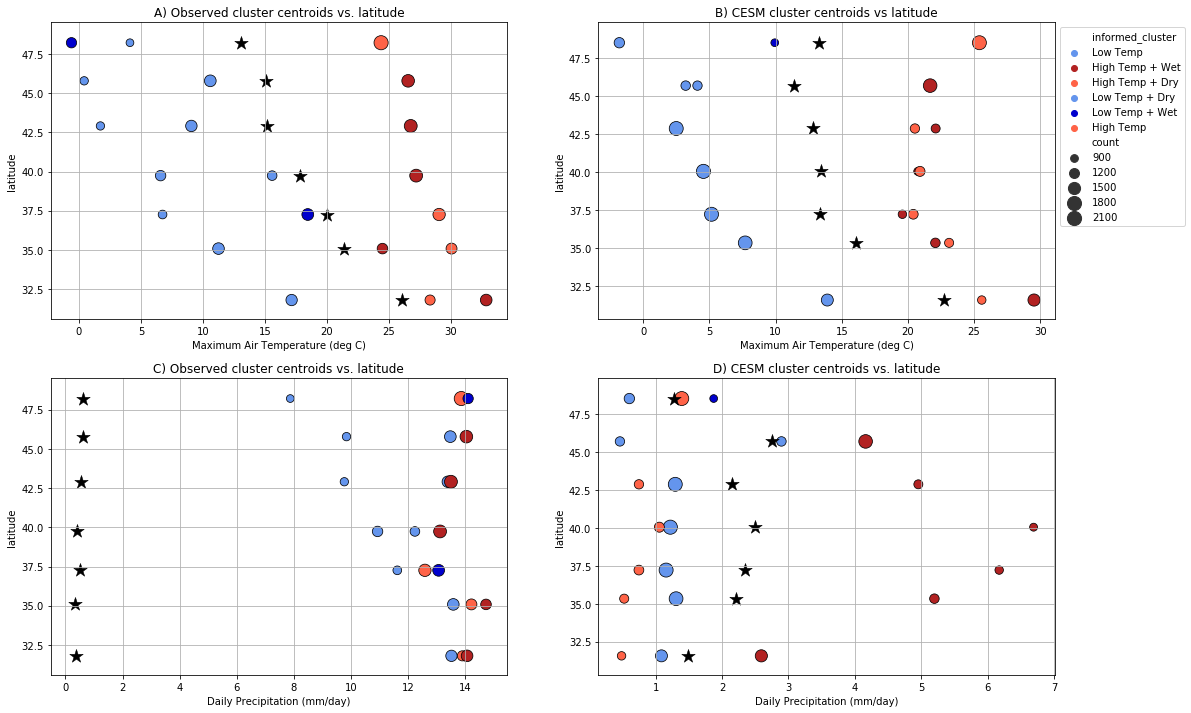

In [20]:
# plot figure 1
fig, axes = plt.subplots(2,2, figsize = (18,12))

# subplot [0,0]: LCD observations max temperature 2011-2021
sb.scatterplot(x = 'drytemp_max',
               y = 'latitude',
               data = obsCentroids,
               sizes = (60,200),
               hue = 'informed_cluster',
               palette = palette,
               edgecolor = 'black',
               legend = None,
               size = 'count',
               ax = axes[0,0])
sb.scatterplot(x = 'drytemp_max',
               y = 'latitude',
               data = obsMeans,
               s = 200,
               color = 'black',
               marker = '*',
               edgecolor = 'black',
               linewidth = 0.5,
               ax = axes[0,0])
axes[0,0].grid()
axes[0,0].set_xlabel('Maximum Air Temperature (deg C)')
axes[0,0].set_title('A) Observed cluster centroids vs. latitude')

# subplot [0,1]: cesm model max temperature 2011-2021
# need to add count to modelCentroids
sb.scatterplot(x = 'TREFHTMX_deg_C',
               y = 'latitude',
               data = modelCentroids,
               sizes = (60,200),
               hue = 'informed_cluster',
               palette = palette,
               edgecolor = 'black',
               size = 'count',
               ax = axes[0,1])
sb.scatterplot(x = 'TREFHTMX_deg_C',
               y = 'latitude',
               data = modelMeans,
               s = 200,
               color = 'black',
               marker = '*',
               edgecolor = 'black',
               linewidth = 0.5,
               ax = axes[0,1])
axes[0,1].grid()
axes[0,1].set_xlabel('Maximum Air Temperature (deg C)')
axes[0,1].set_title('B) CESM cluster centroids vs latitude')

# subplot [1,0]: LCD observations precipitation 2011-2021
sb.scatterplot(x = 'prec_mm_day',
               y = 'latitude',
               data = obsCentroids,
               sizes = (60,200),
               hue = 'informed_cluster',
               palette = palette,
               edgecolor = 'black',
               legend = None,
               size = 'count',
               ax = axes[1,0])
sb.scatterplot(x = 'prec_mm_day',
               y = 'latitude',
               data = obsMeans,
               s = 200,
               color = 'black',
               marker = '*',
               edgecolor = 'black',
               linewidth = 0.5,
               ax = axes[1,0])
axes[1,0].grid()
axes[1,0].set_xlabel('Daily Precipitation (mm/day)')
axes[1,0].set_title('C) Observed cluster centroids vs. latitude')
            
# subplot [1,1]: cesm model precipitation 2011-2021
sb.scatterplot(x = 'PRECT_mm_day',
               y = 'latitude',
               data = modelCentroids,
               sizes = (60,200),
               hue = 'informed_cluster',
               palette = palette,
               edgecolor = 'black',
               legend = None,
               size = 'count',
               ax = axes[1,1])
sb.scatterplot(x = 'PRECT_mm_day',
               y = 'latitude',
               data = modelMeans,
               s = 200,
               color = 'black',
               marker = '*',
               edgecolor = 'black',
               linewidth = 0.5,
               ax = axes[1,1])
axes[1,1].grid()
axes[1,1].set_xlabel('Daily Precipitation (mm/day)')
axes[1,1].set_title('D) CESM cluster centroids vs. latitude')

axes[0,1].legend(bbox_to_anchor = (1,1))

# save the figure to /glade/u/home/scrandall/figure
fig.savefig('/glade/u/home/scrandall/figures/figure1.png')

The cluster centroids of Daily precipitation does not match the means at each location. Will need to look into this before finalizing figure.